# Balancing the gathering and use of information

In [4]:
import numpy as np
import tqdm
import gym, gym_walk
import matplotlib.pyplot as plt
import sys
import warnings
warnings.filterwarnings("ignore")

c:\Users\danie\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Baseline Strategies

## Exploration vs Exploitation Methods

### Greedy: Always exploit

In [144]:
def pure_exploitation(env, n_episodes=5000):
    env.reset()
    print(f'Action space: {env.action_space} size: {env.action_space.n}')
    print(f'Observation space: {env.observation_space} size: {env.observation_space.n}')
    # Initialize the Q-function and the count array to zeros
    Q = np.zeros((env.action_space.n))
    N = np.zeros((env.action_space.n))
    
    Qe = np.empty((n_episodes, env.action_space.n))
    returns = np.empty(n_episodes)
    actions = np.empty(n_episodes, dtype=np.int32)

    name = 'Pure exploitation'

    for e in tqdm.tqdm(range(10), desc='Episodes for: ' + name, leave=False):
        # Select the action that maximizes the estimated Q-values
        action = np.argmax(Q)

        _, reward, _, _, _ = env.step(action)
        N[action] += 1
        Q[action] = Q[action] + (reward - Q[action]) / N[action]

        Qe[e] = Q
        returns[e] = reward
        actions[e] = action


    return name, returns, Qe, actions

env = gym.make('BanditSlipperyWalk-v0', new_step_api=True).env
print(type(env))
print(env)

_, _, _, _ = pure_exploitation(env)


<class 'gym.wrappers.order_enforcing.OrderEnforcing'>
<OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<WalkEnv<BanditSlipperyWalk-v0>>>>>
Action space: Discrete(2) size: 2
Observation space: Discrete(3) size: 3


### Random: Always explore

<class 'gym.wrappers.order_enforcing.OrderEnforcing'>
<OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<WalkEnv<BanditSlipperyWalk-v0>>>>>
Action space: Discrete(2) size: 2
Observation space: Discrete(3) size: 3


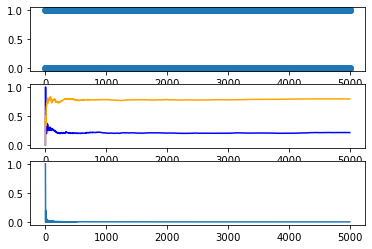

In [141]:
def pure_exploration(env, n_episodes=5000):
    print(f'Action space: {env.action_space} size: {env.action_space.n}')
    print(f'Observation space: {env.observation_space} size: {env.observation_space.n}')
    # Initialize the Q-function and the count array to zeros
    Q = np.zeros((env.action_space.n))
    N = np.zeros((env.action_space.n))
    
    Qe = np.empty((n_episodes, env.action_space.n))
    returns = np.empty(n_episodes)
    actions = np.empty(n_episodes, dtype=np.int32)
    avg_returns = np.empty(n_episodes)

    name = 'Pure exploration'
    return_sum = 0

    for e in range(n_episodes):
        env.reset()

        action = np.random.randint(len(Q))

        _, reward, _, _, _ = env.step(action)
        N[action] += 1
        Q[action] = Q[action] + (reward - Q[action]) / N[action]

        Qe[e] = Q
        returns[e] = reward
        actions[e] = action
        
        return_sum += reward
        avg_returns[e] = np.divide(reward, e)
        #print(f'Action: {action} Reward: {reward} Q[{action}]: {Q[action]} Qe[{e}]: {Qe[e]}')


    return name, returns, Qe, actions, avg_returns

env = gym.make('BanditSlipperyWalk-v0', new_step_api=True).env
print(type(env))
print(env)

name, returns, Qe, actions, avg_returns = pure_exploration(env)

np.set_printoptions(threshold=5000)


plt.subplot(311)
#plt.ylim(0, 1.25)
plt.scatter(range(len(returns)), returns)

plt.subplot(312)
plt.plot(Qe[:, 0], c='Blue')
plt.plot(Qe[:, 1], c='Orange')

plt.subplot(313)
plt.plot(avg_returns)
plt.show()



# Simple strategies

## Epsilon-greedy: Almost always greedy and sometimes random

<class 'gym.wrappers.order_enforcing.OrderEnforcing'>
<OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<WalkEnv<BanditSlipperyWalk-v0>>>>>
Action space: Discrete(2) size: 2
Observation space: Discrete(3) size: 3


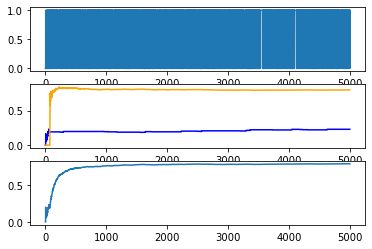

In [140]:
def epsilon_greedy(env, n_episodes=5000, epsilon=0.01):
    print(f'Action space: {env.action_space} size: {env.action_space.n}')
    print(f'Observation space: {env.observation_space} size: {env.observation_space.n}')
    # Initialize the Q-function and the count array to zeros
    Q = np.zeros((env.action_space.n))
    N = np.zeros((env.action_space.n))
    
    Qe = np.empty((n_episodes, env.action_space.n))
    returns = np.empty(n_episodes)
    actions = np.empty(n_episodes, dtype=np.int32)
    avg_returns = np.empty(n_episodes)

    name = 'E-greedy {}'.format(epsilon)
    return_sum = 0

    for e in range(n_episodes):
        env.reset()

        if np.random.random() > epsilon:
            action = np.argmax(Q)
        else:
            action = np.random.randint(len(Q))

        _, reward, _, _, _ = env.step(action)
        N[action] += 1
        Q[action] = Q[action] + (reward - Q[action]) / N[action]

        Qe[e] = Q
        returns[e] = reward
        actions[e] = action

        return_sum += reward
        avg_returns[e] =  np.divide(return_sum, e)
        #print(f'Action: {action} Reward: {reward} Q[{action}]: {Q[action]} Qe[{e}]: {Qe[e]} Avg_returns[{e}]: {avg_returns[e]}')

    

    return name, returns, Qe, actions, avg_returns

env = gym.make('BanditSlipperyWalk-v0', new_step_api=True).env
print(type(env))
print(env)

name, returns, Qe, actions, avg_returns = epsilon_greedy(env)


plt.subplot(311)
#plt.ylim(0, 1.25)
plt.plot(range(len(returns)), returns)

plt.subplot(312)
plt.plot(Qe[:, 0], c='Blue')
plt.plot(Qe[:, 1], c='Orange')


plt.subplot(313)
plt.plot(avg_returns)
plt.show()

## Decaying epsilon-greedy: First maximize exploration, then eploitation

### Linear Decay

<class 'gym.wrappers.order_enforcing.OrderEnforcing'>
<OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<WalkEnv<BanditSlipperyWalk-v0>>>>>
Action space: Discrete(2) size: 2
Observation space: Discrete(3) size: 3


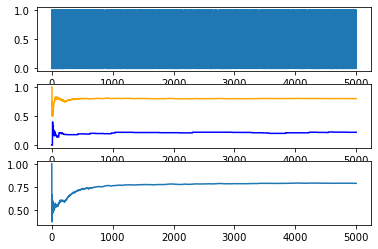

In [139]:
def lin_dec_epsilon_greedy(env, 
                        n_episodes=5000, 
                        init_epsilon=1.0,
                        min_epsilon=0.01,
                        decay_ratio=0.05):
    print(f'Action space: {env.action_space} size: {env.action_space.n}')
    print(f'Observation space: {env.observation_space} size: {env.observation_space.n}')
    # Initialize the Q-function and the count array to zeros
    Q = np.zeros((env.action_space.n))
    N = np.zeros((env.action_space.n))
    
    Qe = np.empty((n_episodes, env.action_space.n))
    returns = np.empty(n_episodes)
    actions = np.empty(n_episodes, dtype=np.int32)
    avg_returns = np.empty(n_episodes)

    name = 'Lin e-greedy {} {} {}'.format(init_epsilon, min_epsilon, decay_ratio)
    return_sum = 0
    decay_episodes = n_episodes * decay_ratio

    for e in range(n_episodes):
        env.reset()

        epsilon = 1 - e / decay_episodes
        epsilon *= init_epsilon - min_epsilon
        epsilon += min_epsilon
        epsilon = np.clip(epsilon, min_epsilon, init_epsilon)
        

        if np.random.random() > epsilon:
            action = np.argmax(Q)
        else:
            action = np.random.randint(len(Q))

        _, reward, _, _, _ = env.step(action)
        N[action] += 1
        Q[action] = Q[action] + (reward - Q[action]) / N[action]

        Qe[e] = Q
        returns[e] = reward
        actions[e] = action

        return_sum += reward
        avg_returns[e] =  np.divide(return_sum, e)
        #print(f'Action: {action} Reward: {reward} Q[{action}]: {Q[action]}' \
        #    f'Qe[{e}]: {Qe[e]} Avg_returns[{e}]: {avg_returns[e]}' \
        #    f' Epsilon: {epsilon}')

    

    return name, returns, Qe, actions, avg_returns

env = gym.make('BanditSlipperyWalk-v0', new_step_api=True).env
print(type(env))
print(env)

name, returns, Qe, actions, avg_returns = lin_dec_epsilon_greedy(env)


plt.subplot(311)
#plt.ylim(0, 1.25)
plt.plot(range(len(returns)), returns)

plt.subplot(312)
plt.plot(Qe[:, 0], c='Blue')
plt.plot(Qe[:, 1], c='Orange')


plt.subplot(313)
plt.plot(avg_returns)
plt.show()

### Exponential Decay

<class 'gym.wrappers.order_enforcing.OrderEnforcing'>
<OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<WalkEnv<BanditSlipperyWalk-v0>>>>>
Action space: Discrete(2) size: 2
Observation space: Discrete(3) size: 3


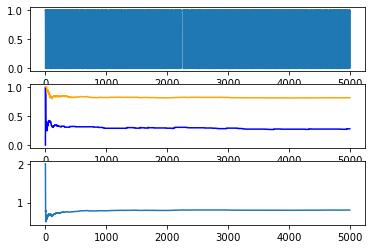

In [138]:
def exp_dec_epsilon_greedy(env, 
                        n_episodes=5000, 
                        init_epsilon=1.0,
                        min_epsilon=0.01,
                        decay_ratio=0.1):
    print(f'Action space: {env.action_space} size: {env.action_space.n}')
    print(f'Observation space: {env.observation_space} size: {env.observation_space.n}')
    # Initialize the Q-function and the count array to zeros
    Q = np.zeros((env.action_space.n))
    N = np.zeros((env.action_space.n))
    
    Qe = np.empty((n_episodes, env.action_space.n))
    returns = np.empty(n_episodes)
    actions = np.empty(n_episodes, dtype=np.int32)
    avg_returns = np.empty(n_episodes)

    name = 'Exp e-greedy {} {} {}'.format(init_epsilon, min_epsilon, decay_ratio)
    return_sum = 0

    decay_episodes = int(n_episodes * decay_ratio)
    rem_episodes = n_episodes - decay_episodes
    epsilons = 0.01
    epsilons /= np.logspace(-2, 0, decay_episodes)
    epsilons *= init_epsilon - min_epsilon
    epsilons += min_epsilon
    epsilons = np.pad(epsilons, (0, rem_episodes), 'edge')

    for e in range(n_episodes):
        env.reset()

        if np.random.random() > epsilons[e]:
            action = np.argmax(Q)
        else:
            action = np.random.randint(len(Q))

        _, reward, _, _, _ = env.step(action)
        N[action] += 1
        Q[action] = Q[action] + (reward - Q[action]) / N[action]

        Qe[e] = Q
        returns[e] = reward
        actions[e] = action

        return_sum += reward
        avg_returns[e] =  np.divide(return_sum, e)
        #print(f'Action: {action} Reward: {reward} Q[{action}]: {Q[action]}' \
        #    f'Qe[{e}]: {Qe[e]} Avg_returns[{e}]: {avg_returns[e]}' \
        #    f' Epsilon: {epsilons[e]}')

    

    return name, returns, Qe, actions, avg_returns

env = gym.make('BanditSlipperyWalk-v0', new_step_api=True).env
print(type(env))
print(env)

name, returns, Qe, actions, avg_returns = exp_dec_epsilon_greedy(env)


plt.subplot(311)
#plt.ylim(0, 1.25)
plt.plot(range(len(returns)), returns)

plt.subplot(312)
plt.plot(Qe[:, 0], c='Blue')
plt.plot(Qe[:, 1], c='Orange')


plt.subplot(313)
plt.plot(avg_returns)
plt.show()

## Optimistic initialization: Start off believing it's a wonderful world

<class 'gym.wrappers.order_enforcing.OrderEnforcing'>
<OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<WalkEnv<BanditSlipperyWalk-v0>>>>>
Action space: Discrete(2) size: 2
Observation space: Discrete(3) size: 3


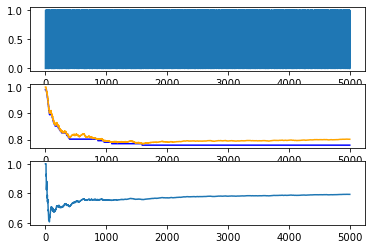

In [137]:
def optimistic_initialization(env, 
                        optimistic_estimate=1.0,
                        initial_count=100,
                        n_episodes=5000):
    print(f'Action space: {env.action_space} size: {env.action_space.n}')
    print(f'Observation space: {env.observation_space} size: {env.observation_space.n}')
    
    # Initialize the Q-function to an optimistic value
    Q = np.full((env.action_space.n), optimistic_estimate, dtype=np.float64)
    N = np.full((env.action_space.n), initial_count, dtype=np.float64)
    
    Qe = np.empty((n_episodes, env.action_space.n))
    returns = np.empty(n_episodes)
    actions = np.empty(n_episodes, dtype=np.int32)
    avg_returns = np.empty(n_episodes)

    name = 'Optimistic {} {}'.format(optimistic_estimate, initial_count)
    return_sum = 0


    for e in range(n_episodes):
        env.reset()

        action = np.argmax(Q)

        _, reward, _, _, _ = env.step(action)
        N[action] += 1
        Q[action] = Q[action] + (reward - Q[action]) / N[action]

        Qe[e] = Q
        returns[e] = reward
        actions[e] = action

        return_sum += reward
        avg_returns[e] =  np.divide(return_sum, e)

    

    return name, returns, Qe, actions, avg_returns

env = gym.make('BanditSlipperyWalk-v0', new_step_api=True).env
print(type(env))
print(env)

name, returns, Qe, actions, avg_returns = optimistic_initialization(env)


plt.subplot(311)
#plt.ylim(0, 1.25)
plt.plot(range(len(returns)), returns)

plt.subplot(312)
plt.plot(Qe[:, 0], c='Blue')
plt.plot(Qe[:, 1], c='Orange')


plt.subplot(313)
plt.plot(avg_returns)
plt.show()

# Advanced strategies

## Softmax: Select actions randomly in proportion to their estimates

<class 'gym.wrappers.order_enforcing.OrderEnforcing'>
<OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<WalkEnv<BanditSlipperyWalk-v0>>>>>
Action space: Discrete(2) size: 2
Observation space: Discrete(3) size: 3


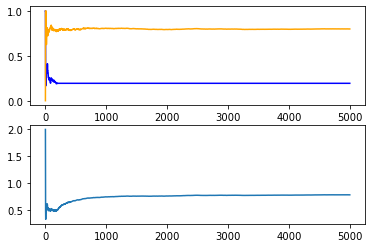

In [136]:
def softmax(env, 
            init_temp=float('inf'),
            min_temp=0.0,
            decay_ratio=0.04,
            n_episodes=5000):
    print(f'Action space: {env.action_space} size: {env.action_space.n}')
    print(f'Observation space: {env.observation_space} size: {env.observation_space.n}')
    
   
    Q = np.zeros((env.action_space.n), dtype=np.float64)
    N = np.zeros((env.action_space.n), dtype=np.int)
    
    Qe = np.empty((n_episodes, env.action_space.n))
    returns = np.empty(n_episodes)
    actions = np.empty(n_episodes, dtype=np.int32)
    avg_returns = np.empty(n_episodes)

    # can't really use infinity
    init_temp = min(init_temp, sys.float_info.max)
    # can't really use zero
    min_temp = max(min_temp, np.nextafter(np.float32(0), np.float32(1)))

    name = 'Softmax {} {} {}'.format(init_temp, min_temp, decay_ratio)
    return_sum = 0

    for e in range(n_episodes):
        env.reset()

        decay_episodes = n_episodes * decay_ratio   
        temp = 1 - e / decay_episodes
        temp *= init_temp - min_temp
        temp += min_temp
        temp = np.clip(temp, min_temp, init_temp)


        scaled_Q = Q / temp
        norm_Q = scaled_Q - np.max(scaled_Q)
        exp_Q = np.exp(norm_Q)
        probs = exp_Q / np.sum(exp_Q)
        assert np.isclose(probs.sum(), 1.0)

        action = np.random.choice(np.arange(len(probs)),
                                    size=1,
                                    p=probs)[0]

        _, reward, _, _, _ = env.step(action)
        N[action] += 1
        Q[action] = Q[action] + (reward - Q[action]) / N[action]

        Qe[e] = Q
        returns[e] = reward
        actions[e] = action

        return_sum += reward
        avg_returns[e] =  np.divide(return_sum, e)

    return name, returns, Qe, actions, avg_returns

env = gym.make('BanditSlipperyWalk-v0', new_step_api=True).env
print(type(env))
print(env)

name, returns, Qe, actions, avg_returns = softmax(env)


plt.subplot(211)
plt.plot(Qe[:, 0], c='Blue')
plt.plot(Qe[:, 1], c='Orange')


plt.subplot(212)
plt.plot(avg_returns)
plt.show()

## UCB: It's not about optimism, it's about realistic optimism

<class 'gym.wrappers.order_enforcing.OrderEnforcing'>
<OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<WalkEnv<BanditSlipperyWalk-v0>>>>>


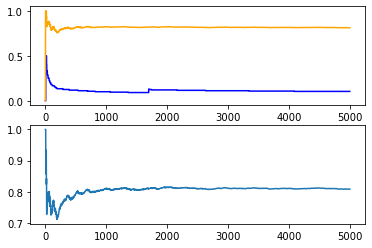

In [145]:
def upper_confidence_bound(env, 
                            c=2,
                            n_episodes=5000):

    Q = np.zeros((env.action_space.n), dtype=np.float)
    N = np.zeros((env.action_space.n), dtype=np.int)
    
    Qe = np.empty((n_episodes, env.action_space.n))
    returns = np.empty(n_episodes)
    actions = np.empty(n_episodes, dtype=np.int32)
    avg_returns = np.empty(n_episodes)

    name = 'UCB {}'.format(c)
    return_sum = 0

    for e in range(n_episodes):
        env.reset()

        if e < len(Q):
            action = e
        else:
            U = np.sqrt(c * np.log(e)/N)

            action = np.argmax(Q + U)
        
        _, reward, _, _, _ = env.step(action)
        N[action] += 1
        Q[action] = Q[action] + (reward - Q[action]) / N[action]

        Qe[e] = Q
        returns[e] = reward
        actions[e] = action

        return_sum += reward
        avg_returns[e] =  np.divide(return_sum, e)

    return name, returns, Qe, actions, avg_returns

env = gym.make('BanditSlipperyWalk-v0', new_step_api=True).env
print(type(env))
print(env)

name, returns, Qe, actions, avg_returns = upper_confidence_bound(env)


plt.subplot(211)
plt.plot(Qe[:, 0], c='Blue')
plt.plot(Qe[:, 1], c='Orange')


plt.subplot(212)
plt.plot(avg_returns)
plt.show()

## Thompson sampling: Balancing reward and risk

<class 'gym.wrappers.order_enforcing.OrderEnforcing'>
<OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<WalkEnv<BanditSlipperyWalk-v0>>>>>


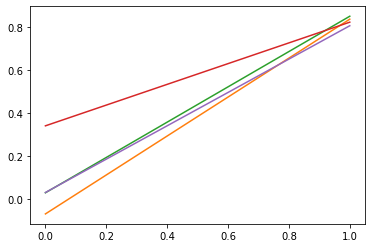

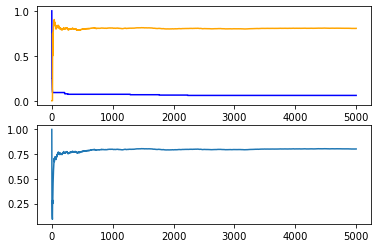

In [15]:
def thompson_sampling(env, 
                    alpha=1,
                    beta=0,
                    n_episodes=5000):

    Q = np.zeros((env.action_space.n), dtype=np.float)
    N = np.zeros((env.action_space.n), dtype=np.int)
    
    Qe = np.empty((n_episodes, env.action_space.n))
    returns = np.empty(n_episodes)
    actions = np.empty(n_episodes, dtype=np.int32)
    avg_returns = np.empty(n_episodes)

    name = 'Thompson Sampling {} {}'.format(alpha, beta)
    return_sum = 0

    for e in range(n_episodes):
        env.reset()

        samples = np.random.normal(loc=Q, scale=alpha/(np.sqrt(N) + beta))
        
        action = np.argmax(samples)
        
        _, reward, _, _, _ = env.step(action)
        N[action] += 1
        Q[action] = Q[action] + (reward - Q[action]) / N[action]

        Qe[e] = Q
        returns[e] = reward
        actions[e] = action

        return_sum += reward
        avg_returns[e] =  np.divide(return_sum, e)
        
    return name, returns, Qe, actions, avg_returns

env = gym.make('BanditSlipperyWalk-v0', new_step_api=True).env
print(type(env))
print(env)

name, returns, Qe, actions, avg_returns = thompson_sampling(env)


plt.subplot(211)
plt.plot(Qe[:, 0], c='Blue')
plt.plot(Qe[:, 1], c='Orange')


plt.subplot(212)
plt.plot(avg_returns)
plt.show()